In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from mpl_toolkits.axes_grid1.colorbar import colorbar

sns.set_palette('colorblind')
sns.set_context('notebook')
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)
matplotlib.rc('axes',labelsize=25) 


In [2]:
df = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyu18.csv')
df.head(1)

,KICID,kepmag_x,Length_Quarters,Length_days,numax,numax_err,dnu,dnu_err,amplitude,err.2_x,...,BC_GBP,BC_GRP,BC_J,BC_H,BC_K,ast_MKs,ast_MH,ast_MJ,ast_MG,ast_M_err
0,892760,13.23,6,380.8,29.48,0.48,3.962,0.116,149.7,8.3,...,-0.74,0.388,1.206,1.638,1.766,-1.671234,-1.543234,-1.111234,0.343766,0.206767


In [28]:
def read_paramdict(majorlabel, minorlabel='', sort='astero'):
    '''Reads in results for either:
        -A full run series (majorlabel) where the minorlabel is included as a
            column in the output.
        -A single run (majorlabel and minorlabel).

        Returns a pandas dataframe.
    '''
    loc = __outdir__+majorlabel+'/'

    if minorlabel != '':
        globlist = glob.glob(loc+sort+'_*'+minorlabel+'*_*pars*.csv')
    else:
        globlist = glob.glob(loc+sort+'_*pars*.csv')

    minorlabels = [os.path.basename(globloc).split('_')[1] for globloc in globlist]

    df = pd.DataFrame()
    for n, globloc in enumerate(globlist):
        sdf = pd.read_csv(globloc, index_col = 0)
        if minorlabels[n] != 'pars.csv':
            sdf[majorlabel] = minorlabels[n]
        df = df.append(sdf)

    return df.sort_values(by=majorlabel)
__outdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/Output/'

In [30]:
read_paramdict('test_build',minorlabel='noCorrection', sort='astero')

,sigo_std,Q,mu_std,sigma_std,sigo,mu,Q_std,sigma,test_build
0,1.193938,0.922297,0.003982,0.005136,9.605049,-1.693791,0.015699,0.037937,-10.0
0,1.162491,0.925171,0.003921,0.005074,9.517912,-1.682660,0.014554,0.038884,-20.0
0,1.164760,0.925492,0.004030,0.004812,9.585125,-1.671424,0.014423,0.038419,-30.0
0,1.138664,0.923856,0.004020,0.004662,9.594356,-1.660132,0.014632,0.037990,-40.0
0,1.146334,0.926354,0.003985,0.005113,9.547612,-1.648964,0.014650,0.038683,-50.0
0,1.198645,0.925446,0.004026,0.005506,9.512383,-1.705042,0.015485,0.038918,0.0
0,1.140637,0.922145,0.004053,0.004622,9.665796,-1.716053,0.014434,0.037550,10.0
0,1.182755,0.920402,0.004094,0.004808,9.591721,-1.727105,0.014729,0.037424,20.0
0,1.170390,0.921455,0.004103,0.004827,9.565134,-1.738276,0.014621,0.037715,30.0
0,1.187544,0.922172,0.004038,0.004951,9.594939,-1.749424,0.015178,0.037859,40.0


# K-band

In [4]:
knoc = read_paramdict('K_tempscale_noCorrection')
krc = read_paramdict('K_tempscale_Clump')
knoc['tempscale'] = knoc['K_tempscale_noCorrection'].str.strip()
knoc['tempscale'] = knoc.tempscale.astype(float)
krc['tempscale'] = krc['K_tempscale_Clump'].str.strip()
krc['tempscale'] = krc.tempscale.astype(float)

## Regular Plot

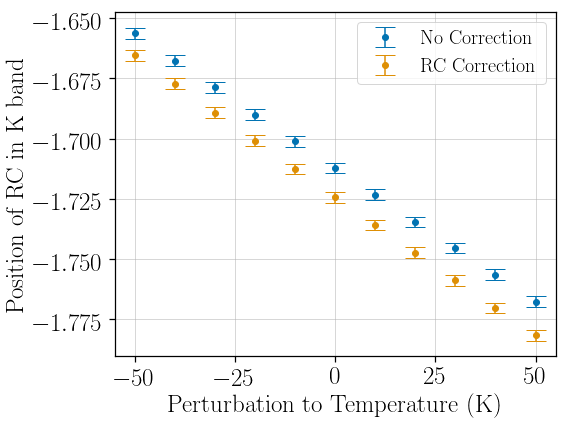

In [5]:
fig = plt.figure(figsize=(8,6))

(_, caps1,_) = plt.errorbar(knoc.tempscale, knoc.mu, yerr = knoc.mu_std, fmt='o', capsize=10, label='No Correction')
(_, caps2,_) = plt.errorbar(krc.tempscale, krc.mu, yerr = krc.mu_std, fmt='o',  capsize=10,label='RC Correction')
for cap1, cap2 in zip(caps1, caps2):
    cap1.set_markeredgewidth(1)
    cap2.set_markeredgewidth(1)
plt.grid(alpha=.5)
plt.xlabel('Perturbation to Temperature (K)')
plt.ylabel('Position of RC in K band')
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

## Violin Plot

In [6]:
mlnc = 'K_tempscale_noCorrection'
mlrc = 'K_tempscale_Clump'
kind = 'astero'
chains = np.array([])
tempscales = np.array([])
ncrc = np.array([])

for ts in knoc.tempscale.values:
    minorlabel = str(ts)
    #Add NC chains & labels
    chain = np.genfromtxt(__outdir__+mlnc+'/'+kind+'_'+minorlabel+'_chains.txt')[0]
    chains = np.append(chains, chain)
    tempscales = np.append(tempscales, np.ones(len(chain))*ts)
    ncrc = np.append(ncrc, ['No Correction']*len(chain))
    
    #Add RC chains & labels
    chain = np.genfromtxt(__outdir__+mlrc+'/'+kind+'_'+minorlabel+'_chains.txt')[0]
    chains = np.append(chains, chain)
    tempscales = np.append(tempscales, np.ones(len(chain))*ts)
    ncrc = np.append(ncrc, ['Clump Corrected']*len(chain))

music = pd.DataFrame()
music['chains'] = chains
music['tempscales'] = tempscales
music['ncrc'] = ncrc

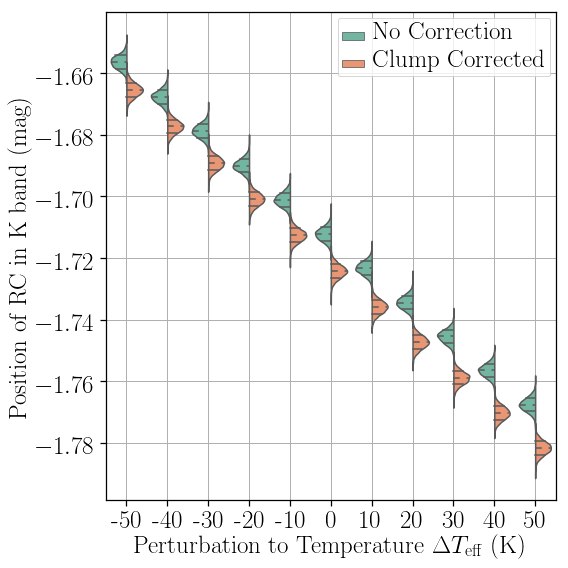

In [7]:
fig = plt.figure(figsize=(8,8))
ax = sns.violinplot(music.tempscales.astype(int).values, music.chains.values, hue=music.ncrc.values,
                    palette='Set2',split=True, inner='quartile')
ax.grid()
ax.set_axisbelow(True)
ax.set(xlabel=r'Perturbation to Temperature $\Delta T_{\rm eff}$ (K)', ylabel='Position of RC in K band (mag)')
# ax.axes.set_title('Posteriors on magnitude of the RC in the K-band', fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='25')
fig.tight_layout()
plt.savefig('/home/oliver/Dropbox/Papers/Hall+18/Figures/posteriors_k.pdf')

# GAIA band

In [8]:
gnoc = read_paramdict('GAIA_tempscale_noCorrection')
grc = read_paramdict('GAIA_tempscale_Clump')
gnoc['tempscale'] = gnoc['GAIA_tempscale_noCorrection'].str.strip()
gnoc['tempscale'] = gnoc.tempscale.astype(float)
grc['tempscale'] = grc['GAIA_tempscale_Clump'].str.strip()
grc['tempscale'] = grc.tempscale.astype(float)

## Regular Plot

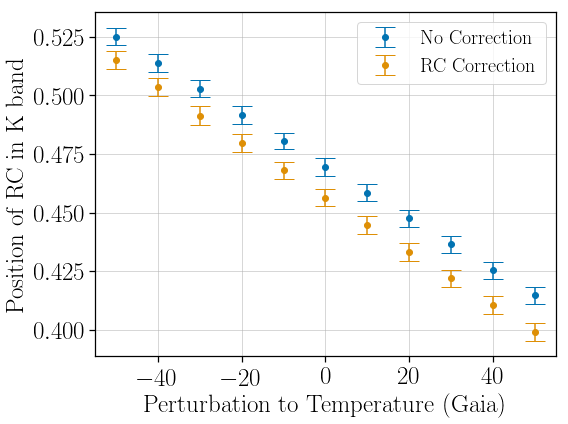

In [9]:
fig = plt.figure(figsize=(8,6))

(_, caps1,_) = plt.errorbar(gnoc.tempscale, gnoc.mu, yerr = gnoc.mu_std, fmt='o', capsize=10, label='No Correction')
(_, caps2,_) = plt.errorbar(grc.tempscale, grc.mu, yerr = grc.mu_std, fmt='o',  capsize=10,label='RC Correction')
for cap1, cap2 in zip(caps1, caps2):
    cap1.set_markeredgewidth(1)
    cap2.set_markeredgewidth(1)
plt.grid(alpha=.5)
plt.xlabel('Perturbation to Temperature (Gaia)')
plt.ylabel('Position of RC in K band')
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

## Violin Plot

In [10]:
mlnc = 'GAIA_tempscale_noCorrection'
mlrc = 'GAIA_tempscale_Clump'
kind = 'astero'
chains = np.array([])
tempscales = np.array([])
ncrc = np.array([])

for ts in gnoc.tempscale.values:
    minorlabel = str(ts)
    #Add NC chains & labels
    chain = np.genfromtxt(__outdir__+mlnc+'/'+kind+'_'+minorlabel+'_chains.txt')[0]
    chains = np.append(chains, chain)
    tempscales = np.append(tempscales, np.ones(len(chain))*ts)
    ncrc = np.append(ncrc, ['No Correction']*len(chain))
    
    #Add RC chains & labels
    chain = np.genfromtxt(__outdir__+mlrc+'/'+kind+'_'+minorlabel+'_chains.txt')[0]
    chains = np.append(chains, chain)
    tempscales = np.append(tempscales, np.ones(len(chain))*ts)
    ncrc = np.append(ncrc, ['Clump Corrected']*len(chain))

music = pd.DataFrame()
music['chains'] = chains
music['tempscales'] = tempscales
music['ncrc'] = ncrc

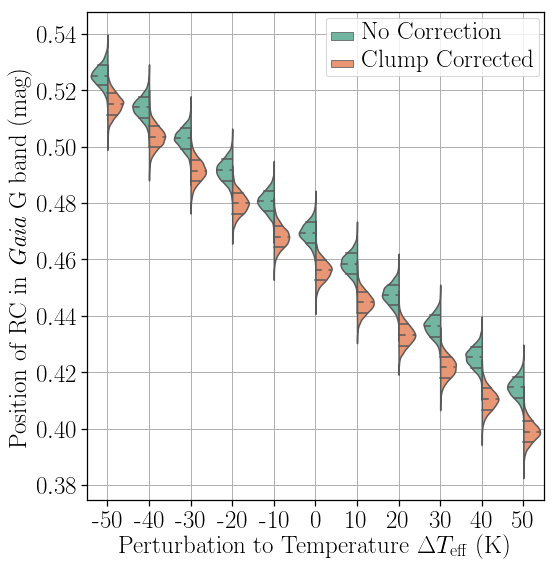

In [11]:
fig = plt.figure(figsize=(8,8))
ax = sns.violinplot(music.tempscales.astype(int).values, music.chains.values, hue=music.ncrc.values,
                   palette='Set2', split=True, inner='quartile')
ax.grid()
ax.set_axisbelow(True)
ax.set(xlabel=r'Perturbation to Temperature $\Delta T_{\rm eff}$ (K)', ylabel=r'Position of RC in $\emph{Gaia}$ G band (mag)')
# ax.axes.set_title('Posteriors on magnitude of the RC in the Gaia G-band', fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='25')
fig.tight_layout()
plt.savefig('/home/oliver/Dropbox/Papers/Hall+18/Figures/posteriors_g.pdf')

# TESTING SPACE band

In [35]:
testnoc

,sigo_std,Q,mu_std,sigma_std,sigo,mu,Q_std,sigma,test_build
0,1.193938,0.922297,0.003982,0.005136,9.605049,-1.693791,0.015699,0.037937,-10.0
0,1.162491,0.925171,0.003921,0.005074,9.517912,-1.682660,0.014554,0.038884,-20.0
0,1.164760,0.925492,0.004030,0.004812,9.585125,-1.671424,0.014423,0.038419,-30.0
0,1.138664,0.923856,0.004020,0.004662,9.594356,-1.660132,0.014632,0.037990,-40.0
0,1.146334,0.926354,0.003985,0.005113,9.547612,-1.648964,0.014650,0.038683,-50.0
0,1.198645,0.925446,0.004026,0.005506,9.512383,-1.705042,0.015485,0.038918,0.0
0,1.140637,0.922145,0.004053,0.004622,9.665796,-1.716053,0.014434,0.037550,10.0
0,1.182755,0.920402,0.004094,0.004808,9.591721,-1.727105,0.014729,0.037424,20.0
0,1.170390,0.921455,0.004103,0.004827,9.565134,-1.738276,0.014621,0.037715,30.0
0,1.187544,0.922172,0.004038,0.004951,9.594939,-1.749424,0.015178,0.037859,40.0


In [36]:
testnoc = read_paramdict('test_build',minorlabel='noCorrection', sort='astero')
testrc = read_paramdict('test_build',minorlabel='Clump', sort='astero')
testnoc['tempscale'] = testnoc['test_build'].str.strip()
testnoc['tempscale'] = testnoc.tempscale.astype(float)
testrc['tempscale'] = testrc['test_build'].str.strip()
testrc['tempscale'] = testrc.tempscale.astype(float)

In [38]:
testnoc

,sigo_std,Q,mu_std,sigma_std,sigo,mu,Q_std,sigma,test_build,tempscale
0,1.193938,0.922297,0.003982,0.005136,9.605049,-1.693791,0.015699,0.037937,-10.0,-10.0
0,1.162491,0.925171,0.003921,0.005074,9.517912,-1.682660,0.014554,0.038884,-20.0,-20.0
0,1.164760,0.925492,0.004030,0.004812,9.585125,-1.671424,0.014423,0.038419,-30.0,-30.0
0,1.138664,0.923856,0.004020,0.004662,9.594356,-1.660132,0.014632,0.037990,-40.0,-40.0
0,1.146334,0.926354,0.003985,0.005113,9.547612,-1.648964,0.014650,0.038683,-50.0,-50.0
0,1.198645,0.925446,0.004026,0.005506,9.512383,-1.705042,0.015485,0.038918,0.0,0.0
0,1.140637,0.922145,0.004053,0.004622,9.665796,-1.716053,0.014434,0.037550,10.0,10.0
0,1.182755,0.920402,0.004094,0.004808,9.591721,-1.727105,0.014729,0.037424,20.0,20.0
0,1.170390,0.921455,0.004103,0.004827,9.565134,-1.738276,0.014621,0.037715,30.0,30.0
0,1.187544,0.922172,0.004038,0.004951,9.594939,-1.749424,0.015178,0.037859,40.0,40.0


## Regular Plot

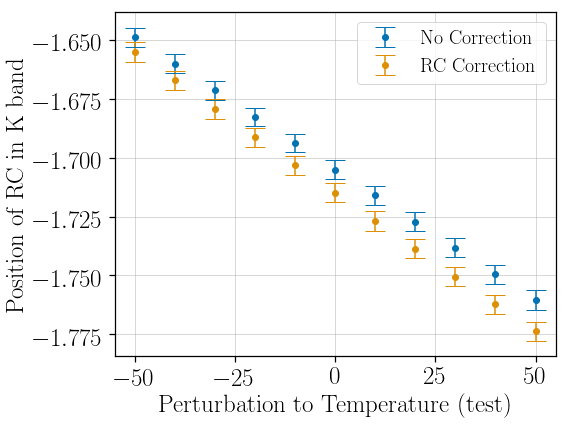

In [39]:
fig = plt.figure(figsize=(8,6))

(_, caps1,_) = plt.errorbar(testnoc.tempscale, testnoc.mu, yerr = testnoc.mu_std, fmt='o', capsize=10, label='No Correction')
(_, caps2,_) = plt.errorbar(testrc.tempscale, testrc.mu, yerr = testrc.mu_std, fmt='o',  capsize=10,label='RC Correction')
for cap1, cap2 in zip(caps1, caps2):
    cap1.set_markeredgewidth(1)
    cap2.set_markeredgewidth(1)
plt.grid(alpha=.5)
plt.xlabel('Perturbation to Temperature (test)')
plt.ylabel('Position of RC in K band')
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

## Violin Plot

In [44]:
mlnc = 'test_build'
mlrc = 'test_build'
kind = 'astero'
chains = np.array([])
tempscales = np.array([])
ncrc = np.array([])

for ts in gnoc.tempscale.values:
    minorlabel = str(ts)
    #Add NC chains & labels
    chain = np.genfromtxt(__outdir__+mlnc+'/'+kind+'_'+minorlabel+'_K__noCorrection_chains.txt')[0]
    chains = np.append(chains, chain)
    tempscales = np.append(tempscales, np.ones(len(chain))*ts)
    ncrc = np.append(ncrc, ['No Correction']*len(chain))
    
    #Add RC chains & labels
    chain = np.genfromtxt(__outdir__+mlrc+'/'+kind+'_'+minorlabel+'_K__Clump_chains.txt')[0]
    chains = np.append(chains, chain)
    tempscales = np.append(tempscales, np.ones(len(chain))*ts)
    ncrc = np.append(ncrc, ['Clump Corrected']*len(chain))

music = pd.DataFrame()
music['chains'] = chains
music['tempscales'] = tempscales
music['ncrc'] = ncrc

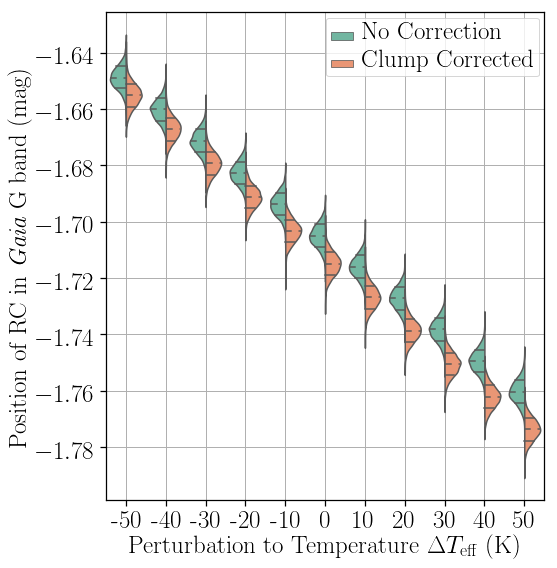

In [45]:
fig = plt.figure(figsize=(8,8))
ax = sns.violinplot(music.tempscales.astype(int).values, music.chains.values, hue=music.ncrc.values,
                   palette='Set2', split=True, inner='quartile')
ax.grid()
ax.set_axisbelow(True)
ax.set(xlabel=r'Perturbation to Temperature $\Delta T_{\rm eff}$ (K)', ylabel=r'Position of RC in $\emph{Gaia}$ G band (mag)')
# ax.axes.set_title('Posteriors on magnitude of the RC in the Gaia G-band', fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='25')
fig.tight_layout()
plt.savefig('/home/oliver/Dropbox/Papers/Hall+18/Figures/posteriors_g.pdf')

# Conclusion
Inflating the BC uncertainties increases the spread on these values considerably, but this should not be necessary. Better instead would be to run bccodes for each subset of Teff values.